In [39]:
#import torch

In [40]:
#!pip install Voila

In [41]:
#!pip install graphviz

In [7]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [8]:
from fastbook import *
from fastai.vision.widgets import*

In [15]:
import pathlib

In [19]:
DATASET_PATH = Path("C:/Users/Vishal/Downloads/Mask_dataset/train Dataset _ mask")

In [20]:
mask_datablock = DataBlock(
           get_items=get_image_files,
           get_y=parent_label,
           blocks=(ImageBlock, CategoryBlock), 
           item_tfms=RandomResizedCrop(224, min_scale=0.3),
           splitter=RandomSplitter(valid_pct=0.2, seed=100),
           batch_tfms=aug_transforms(mult=2)
        )

In [22]:
  #!nvidia-smi

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


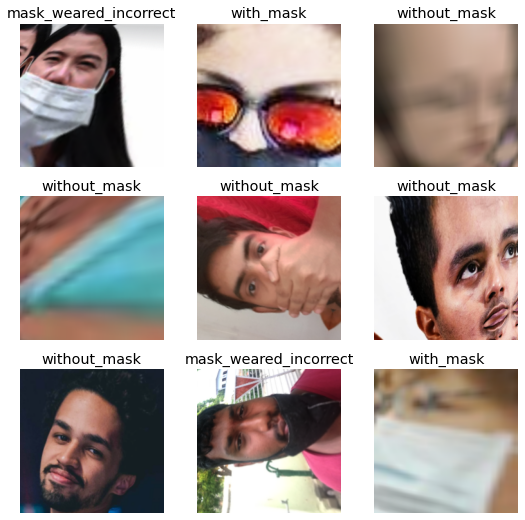

In [24]:
dls = mask_datablock.dataloaders(DATASET_PATH)
dls.show_batch()

In [25]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Vishal/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|█████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:25<00:00, 3.44MB/s]
C:\Users\Vishal\anaconda3\envs\Virtual\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [26]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.642750,0.682995,0.259740,02:15


epoch,train_loss,valid_loss,error_rate,time
0,1.064202,0.590294,0.233766,02:30
1,0.942465,0.367474,0.155844,02:20
2,0.845076,0.268148,0.116883,03:18
3,0.809464,0.229653,0.110390,03:36


# Exporting the model

In [27]:
learn.export()

In [28]:
path = Path()
path.ls(file_exts ='.pkl')

(#1) [Path('export.pkl')]

# Loading the Model

In [30]:
learn_inf = load_learner(path/'export.pkl')

Prediction 

In [31]:
learn_inf.predict("C:/Users/Vishal/Desktop/Test_Mask_file.jpg")

('with_mask', tensor(1), tensor([2.5120e-01, 7.4877e-01, 2.2648e-05]))

In [32]:
learn_inf.dls.vocab

['mask_weared_incorrect', 'with_mask', 'without_mask']

In [33]:
# Add Widgets to upload images & Classify them

In [36]:
upload_btn = widgets.FileUpload()

run_btn = widgets.Button(description = "Classify ")

output_btn = widgets.Output()

label_pred = widgets.Label()


def on_click_classify(change):
    img = PILImage.create(upload_btn.data[-1])
    output_btn.clear_output()
    with output_btn: display(img.to_thumb(224,224))
    pred , pred_idx,pred_prob = learn_inf.predict(img)
    label_pred.value = f'Prediction: {pred} ; Probability :{pred_prob[pred_idx]: 0.04f}'
    
run_btn.on_click(on_click_classify)

In [37]:
VBox([widgets.Label("upload image to classify !"), upload_btn , run_btn , output_btn , label_pred])
